---
title: "Generative Topographic Mapping"
date: last-modified
author: "John Waczak"
body-header: last-modified
format:
    html:
      html-math-method: katex

reference-location: margin
citation-location: margin
---

# Introduction 

*Goal*: We want models that can find interesting structures in un-structured data without the need for human labeling or intervention. The key feature of many such methods is that they perform **Dimensionality reduction**. Data in some high dimensional feature space are *assumed* to truly be living on a lower dimensional submanifold of the higher dimensional space. If the goal is to visualize interesting structures in the data, typically, we chose the dimension of the reduced data to be $2$, or $3$.

**Generative Topographic Mapping** assumes that our large dimensional dataset $\mathcal{D}\subseteq \mathbb{R}^D$ is actually *generated* by a set of **latent variables** living in $\mathbb{R}^L$. For visualization, we will typically choose $L=2$, but strictly speaking, we require only that $L<D$. Our goal then is to learn the mapping from latent variables to our data space. 

## Notation: 

| Notation | Description | Notes |
| --- | --- | --- |
| $\mathbf{x}\in\mathbb{R}^L$ | Latent vector | |
| $\mathbf{t}_n \in \mathbb{R}^D$ | Data vector | $n=1,..., N$ |
| $\mathbf{y}=\mathbf{y}(\mathbf{x};w)$ | latent vector transformation | $\mathbf{y}:\mathbb{R}^L\mapsto\mathbb{R}^D$ |
| $w$ | vector/matrix of weights for the mapping transformation | | 

The **GTM** is a principled expansion of both *Factor Analysis* (the linear latent variable model) and the *Self Organizing Map* (aka Kohonen Maps). 

To expand the capabilities of *factor analysis* to consider nonlinear transformations of latent vectors, we consider the underlying distribution 
\begin{equation}
    p(\mathbf{t}\vert \mathbf{x},w,\beta) := \mathcal{N}(\mathbf{y}(\mathbf{x};w), \frac{1}{\beta})
\end{equation}
i.e. the embedded (transformed) latent vectors are normally distributed with mean given by $\mathbf{y}$ and covariance $\beta^{-1}$. Provided we have some knowledge of the distribution of latent vectors $p(\mathbf{x})$ (aka the Bayesian prior), we can then integrate to obtain

\begin{equation}
    p(\mathbf{t}\vert w, \beta) = \int d\mathbf{x}; p(\mathbf{t}\vert \mathbf{x},w,\beta)p(\mathbf{x})
\end{equation}

This is what we really want: the distribution of our embedded data $\mathbf{t}$ given the parameters of our model $w$ and $\beta$. Unfortunately, this integral is not tractible without a *nice* model for $p(\mathbf{x})$. We therefore take inspiration from the *Self Organizing Map* which models latent vectors as the nodes of a topologically connected mesh. Thus, we form 

\begin{equation}
    p(\mathbf{x}) := \frac{1}{K}\sum_k^K \delta(\mathbf{x}-\mathbf{x}_k)
\end{equation}

In words: the latent dataspace is described by $K$ vectors $\mathbf{x}_k$ which lie preciesly on the nodes of a regular mesh. For any latent vector $\mathbf{x}$, there is a probability of $1/K$ that it *came from* the $k^{th}$ vector $\mathbf{x}_k$. 

As mathematicians (or physicists, or data scientists, etc...) we rejoice at the site of the Dirac-$\delta$ functions which greatly simplify our integration. Our embedded data distribution now becomes: 
\begin{align}
    p(\mathbf{t}\vert w,\beta) &= \int d\mathbf{x}\; p(\mathbf{t}\vert \mathbf{x}, w, \beta) \frac{1}{K}\sum_k^K \delta(\mathbf{x}-\mathbf{x}_k) \\ 
    &= \frac{1}{K}\sum_k^K p(\mathbf{t}\vert \mathbf{x}_k, w, \beta)
\end{align}
which is *much*, *much* nicer to deal with.

The question now becomes the following: provided a dataset $\mathcal{D}=\{\mathbf{t}_1, ..., \mathbf{t}_N \}$, what are the best parameters $w$ and $\beta$ to fit our latent variable model? Assuming each of the $\mathbf{t}_i$ are independent and indetically distributed, we can write the *likelihood* (odds of obtaining parameters $w$ and $\beta$  given the dataset $\mathcal{D}$) as 
\begin{align}
    \mathcal{L}(w,\beta) &:= \prod_n^N p(\mathbf{t}_n\vert w, \beta) \\ 
    &= \prod_n^N \left[ \frac{1}{K}\sum_k^K p(\mathbf{t}_n\vert \mathbf{x}_k, w, \beta) \right]
\end{align}

Sums are easier to manipulate than products and so we make the strategic choice to instead work with the *log-likelihood* function $\ell(w,\beta)=\log(\mathcal{L}(w,\beta))$

\begin{equation}
    \ell(w, \beta) = \sum_n^N \ln\left\{ \frac{1}{K}\sum_k^K p(\mathbf{t}_n\vert \mathbf{x}_k, w, \beta) \right\}
\end{equation}

We now have an optimization problem! Our goal is to find those $w$ and $\beta$ which maximize the likelihood of obtaining our dataset $\mathcal{D}=\{\mathbf{t}_1, ... , \mathbf{t}_N\}$ from the latent vectors $\mathbf{x}_k$ living on the regular SOM-like grid. 

## Summary so far
- We treat our data as points, $\mathbf{t}$, living in living in a manifold $\mathcal{D}$ which is embedded in some high dimensional space $\mathbb{R}^D$. 
- We assume our data is Normally distributed in this high dimensional space with mean $\mathbf{y}(\mathbf{x};w)$ and covariance $\beta^{-1}$
- Each of our data points actually **comes from** a lower dimensional latent space of points $\mathbf{x}$. 
- These lower dimensional points are then mapped by a nonlinear function $\mathbf{y}=\mathbf{y}(\mathbf{x};w)$ to the data manifold $\mathcal{D}$
- We assume that the distribution of latent data is given by a set of discrete points $\mathbf{x}_k$ spaced on a regular grid. This was inspired by the Self organizing map and provides the nice topological properties of the GTM. 
- Given the Bayesian prior for $p(\mathbf{x})$, we then can construct the *log-likelihood* function $\ell(w,\beta)$ which tells us the likelihood of obtaining our data $\mathbf{t}_n$ given our model for the latent variable transformation (parametrized by weights $w$) and assumed Gaussian distribution of data points (with covariance $\beta^{-1}$). 
- Maximizing $\ell(w, \beta)$ with respect to $w$ and $\beta$ will yield our fitted latent-variable model. 
- We can then use Baye's rule to invert the distribution and obtain $p(\mathbf{x_k}\vert \mathbf{t}_n)$, i.e. the responsability of the $k^{th}$ latent variable for producing the $n^{th}$ data point. 

::: {.callout-note}
We should make the notion of vector, manifold, and point here more precise.
:::

# EM Algorithm for GTM

Theoretically at this point we have all we need to solve the problem. We can assume some initial guess for $w$ and $\beta$ and proceed with any of our favorite optimization routines. However the double sum in $\ell$ presents some computational complexity that suggests we might seek an alternative optimization scheme. We still have not yet defined the specific form for the nonlinear latent variable transformation $\mathbf{y}(\mathbf{x}; w)$ and consequently can utilize the oportunity to manufacture a form for $\mathbf{y}$ amenable to an expectation-maximization scheme. 

## The Expectation Step

To begin, suppose we already have some values for the parameters $w_{o}$ and $\beta_{o}$ ($o$ for *old*). To make our lives simpler, we'll write $\theta :=(w,\beta)$ to save space. Given these values, we can compute the responsabilities $r_{kn}$
\begin{align}
    r_{kn} := p(\mathbf{x}_k \vert \mathbf{t}_n, \theta_o) &= \frac{p(\mathbf{t}_n\vert \mathbf{x}_k, \theta_o)p(\mathbf{x}_k\vert \theta_0 )}{p(\mathbf{t}_n\vert \theta_0 )} \\
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)p(\mathbf{x}_k \vert \theta_o)}{p(\mathbf{t}_n \vert \theta_o)} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)p(\mathbf{x}_k \vert \theta_o)}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)p(\mathbf{x}_{k'},\theta_o)} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)\frac{p(\mathbf{x}_k,\theta_o)}{p(\theta_o)}}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)p(\mathbf{x}_{k'}\vert\theta_o)} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)\frac{p(\mathbf{x}_k,\theta_o)}{p(\theta_o)}}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)\frac{p(\mathbf{x}_{k'},\theta_o)}{p(\theta_o)}} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)\frac{p(\mathbf{x}_k,\theta_o)}{p(\theta_o)}}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)\frac{p(\mathbf{x}_{k'},\theta_o)}{p(\theta_o)}} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)p(\mathbf{x}_k,\theta_o)}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)p(\mathbf{x}_{k'},\theta_o)} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)p(\mathbf{x}_k)p(\theta_o)}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)p(\mathbf{x}_{k'})p(\theta_o)} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)p(\mathbf{x}_k)}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)p(\mathbf{x}_{k'})} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)\frac{1}{K}}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)\frac{1}{K}} \\ 
    &= \frac{p(\mathbf{t}_n \vert \mathbf{x}_k, \theta_o)}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},\theta_o)} \\ 
\end{align}
\begin{equation}
    \boxed{r_{kn} = \frac{p(\mathbf{t}_n\vert \mathbf{x}_k, \theta_o)}{\sum_{k'}^K p(\mathbf{t}_n \vert \mathbf{x}_{k'}, \theta_o)}},
\end{equation}

or in words, $r_{kn}$ is the posterior i.e. the probability that the $n^{th}$ data point *came from* the $k^{th}$ latent node $\mathbf{x}_k$.  This is the expectation step


::: {.callout-note}
The latent variable points $\mathbf{x}_k$ don't move but their transformed locations in the embedded data manifold *do* as the weights $w$ are updated.
:::

## Deciding on a form for $\mathbf{y}$

$\mathbf{y}$ can be any nonlinear, parametric model (for example a multi-layer-perceptron). FOr convenience, we choose a generalized (kernalized) linear regression: 
\begin{equation}
    \mathbf{y} := W\phi(\mathbf{x})
\end{equation}
where $W\in\mathbb{R}^{D\times M}$ and $\phi(\mathbf{x})\in\mathbb{R}^M$. Here $\phi_m$ is the $m^{th}$ basis function applied to $\mathbf{x}$. In order to capture linear *and* nonlinear effects, a combination of linear basis functions and Radial Basis Functions (RBF) are used so that
\begin{equation}
    \phi_m(\mathbf{x}) = \begin{cases} 
        \exp(- \frac{1}{2\sigma}\lvert \mathbf{x}-\mathbf{\mu}_m\rvert^2) & m \leq M_{NL} \\ 
        \mathbf{x}^{(l)} & m = M_{NL} + l, \qquad l\in 1, ..., L \\ 
        1 & m = M_{NL} + L + 1 = M
    \end{cases}
\end{equation}
i.e. a combination of $M_{NL}$ gausians with centers $\mathbf{\mu}_m$ and $L$ linear functions. For convenience, we can write this in matrix form: 
\begin{equation}
    Y = \Phi W
\end{equation}
with $\Phi \in \mathbb{R}^{K\times M}$ so that $\Phi_{km} = \phi_m(\mathbf{x}_k)$. 

## The Maximization Step

::: {.callout-note} 
We should add an derivation that demonstrates why EM is *guarenteed* to increase the log-likelihood function.
:::

We now derive the maximization step, or in other words, given the previous values $\theta_o$ and the responsabilities $r_{kn}$, how do we obtain $\theta_n$ (n for new) so that our log-likelihood function increases? We differentiate $\ell$ with respect to the parameters while treating $r_{kn}$ as constant: 
\begin{align}
    \ell(w,\beta) &= \sum_n^N \ln \left(\frac{1}{K}\sum_k^K p(\mathbf{t}_n\vert \mathbf{x}_k, w, \beta ) \right) \\
    0 &= \frac{\partial}{\partial w_{md}}\ell(w, \beta) \\ 
    &= \frac{\partial}{\partial w_{md}} \sum_n^N \ln \left(\frac{1}{K}\sum_k^K p(\mathbf{t}_n\vert \mathbf{x}_k, w, \beta ) \right) \\
    &= \sum_n^N \frac{1}{\frac{1}{K}\sum_{k'}^Kp(\mathbf{t}_n\vert \mathbf{x}_{k'}, w, \beta)}\frac{1}{K}\frac{\partial}{\partial w_{md}}\sum_k^K p(\mathbf{t}_n \vert \mathbf{x}_k, w, \beta) \\
    &= \sum_n^N\sum_k^K \frac{ \frac{\partial}{\partial w_{md}} p(\mathbf{t}_n\vert\mathbf{x}_k,w,\beta)  }{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},w,\beta)} \\
    &= \sum_n^N\sum_k^K \frac{p(\mathbf{t}_n\vert \mathbf{x}_k, w, \beta)}{\sum_{k'}^K p(\mathbf{t}_n\vert \mathbf{x}_{k'},w,\beta)} \frac{\partial}{\partial w_{md}} \left\{ \frac{-\beta}{2}\sum_d^D \left(t_n^{(d)} - y_k^{(d)} \right)^2 \right\}  \\
    &= \sum_n^N\sum_k^K r_{nk} \frac{\partial}{\partial w_{md}} \left\{ \frac{-\beta}{2}\sum_d^D \left(t_n^{(d)} - y_k^{(d)} \right)^2 \right\}  \\
    &= \sum_n^N\sum_k^K r_{nk}(-\beta)  \sum_d^D \left(t_n^{(d)} - y_k^{(d)} \right) \frac{\partial y_k^{(d)}}{\partial w_{md}} \\
    &= \sum_n^N\sum_k^K r_{nk}\beta   \sum_d^D \left( y_k^{(d)} - t_n^{(d)} \right) \frac{\partial}{\partial w_{md}}\sum_{s}^M\phi_s(\mathbf{x}_k)w_{sd} \\
    &= \sum_n^N\sum_k^K r_{nk}\beta   \sum_d^D \left( y_k^{(d)} - t_n^{(d)} \right) \sum_{s}^M\phi_s(\mathbf{x}_k)\delta_{ms} \\
    &= \sum_n^N\sum_k^K r_{nk}\beta   \sum_d^D \left( y_k^{(d)} - t_n^{(d)} \right) \phi_m(\mathbf{x}_k) \\
    &= \sum_n^N \sum_k^K \sum_d^D \beta \; r_{nk}  \left( y_k^{(d)} - t_n^{(d)} \right) \phi_m(\mathbf{x}_k) \\
\end{align}

Let us now define the diagonal matrix $G$ given by $G_{kk} = \sum_n r_{nk}$. Then the system of equations has become: 
\begin{align}
    \sum_n \sum_k \sum_d r_{nk} y_k^{(d)}\phi_m(\mathbf{x}_k) &= \sum_n \sum_k \sum_d r_{nk}t_n^{(d)}\phi_m(\mathbf{x}_k) \\ 
    \sum_n\sum_k\sum_d r_{nk} \left( \sum_s \phi_s(\mathbf{x}_k)w_{sd} \right) \phi_m(\mathbf{x}_k) &= \sum_n \sum_k \sum_d r_{nk}t_n^{(d)}\phi_m(\mathbf{x}_k) \\ 
    \sum_k\sum_d\sum_s G_{kk}\Phi_{sk}w_{sd}\Phi_{mk} &= \sum_n\sum_k\sum_d r_{nk}t_{nd}\Phi_{mk}
\end{align}
where $\Phi$ is the matrix with components $\Phi_{mk} = \phi_m(\mathbf{x}_k)$. Similarly define $R$ as the matrix with components $R_{nk}=r_{nk}$ and $T$ as the data matrix with components $T_{nd}=t_n^{(d)}$. With these convenctions, the entire system can be written as
\begin{equation}
    \Phi^T G \Phi W = \Phi^T R T
\end{equation}

Performing the same procedure for the derivative w.r.t. $\beta$, we find
\begin{equation}
    \frac{1}{\beta} = \frac{1}{ND}\sum_n^N\sum_k^K r_{kn} \lVert \mathbf{y}(\mathbf{x}_k, w) - \mathbf{t}_n\rVert^2
\end{equation}

Thus, once we have determined the responsabilities via the *expectation step*, we perform the maximization step via
\begin{equation}
    \boxed{ \Phi^T G_{\text{old}}\Phi W_{\text{new}} = \Phi^TR_{\text{old}}T}
\end{equation}
\begin{equation}
    \boxed{\frac{1}{\beta_{\text{new}}} = \frac{1}{ND}\sum_n^N\sum_k^K r_{kn}^{\text{(old)}}\lVert \phi(\mathbf{y}(\mathbf{x}_k, W_{\text{new}}) - \mathbf{t}_n \rVert^2}
\end{equation}

## Initialization for the EM Algorithm

The last needed piece to be able to fit our GTM model is a plan for how to initialize the model parameters in $W_{md}$ and $\beta$. A simple strategy is to randomnly initialize the weights before training. Once can do a slightly better job by forcing the weight variance to yield a variance in the projected values $\mathbf{y}$ that matches the variance of the data. This is easily accomplished by means of principal component analysis. We use the following strategy: 

1. Obtain the data covariance matrix `U` whose columns are the principal components of our dataset $\mathcal{D}$. 
2. Keep only the first two principal components as our latent space will be 2-dimensional. 
3. Fit $W$ so that $W\Phi \approx UX^T$. 
4. Set $\beta^{-1}$ to be the variance of the third principal component vector. 

::: {.callout-note}
We should check the dimensions of the equation in `3.` so that everything matches.
:::

## EM Algorithm Summary 

1. Generate a grid of latent points $\{ \mathbf{x}_k \}$ with $k=1,...,K$. 
2. Generate a grid of basis function centers $\{\mathbf{\mu}_m\}$ with $m=1, ..., M$. 
3. Select the basis function width $\sigma$. 
4. Compute the matrix of basis function activations $\Phi$ where $\Phi_{mk} = \Phi_m(\mathbf{x}_k)$. 
5. Initialize the weight matrix $W$ randomly or with PCA
6. Initialize $\beta$. 
7. If desired, select a value $\alpha$ to allow for weight regularization, i.e. $(\Phi^TG\Phi + \frac{\alpha}{\beta}I)W = \Phi^TRT$. This corresponds to specifying a Bayesian prior distribution over $W$ with 
\begin{equation}
    p(W) = \left(\frac{\alpha}{2\pi}\right)^{W/2}\exp(-\frac{\alpha}{2}\lVert W \rVert^2)
\end{equation}
8. Compute difference matrix $\mathbf{\Delta}$ with $\Delta_{kn} := \lVert \mathbf{t}_n - \phi_k W \rVert^2$
9. Repeat the following until *convergence* 
    1. Compute the responsability matrix $R$ using $\Delta$ and $\beta$
    2. Compute $G$ from the responsability matrix $R$ 
    3. Update the weight matrix $W$ with $W = (\Phi^TG\Phi)^{-1}\Phi^TRT$
    4. Compute updated $\mathbf{\Delta}$ 
    5. Update $\beta$ 

# Visualization of Results

Once we have fit a GTM model to our dataset $\mathcal{D}$ and determined suitable parameters $W$ and $\beta$, we can define a distribution in the data space conditioned on our latent variables $\mathbf{x}_k$, that is $p(\mathbf{t}\vert \mathbf{x}_k$ for $k=1,...,K$. Using Baye's theorem, we can then compute the posterior distribution in the *latent space* for any point in the data space, in other words, given a datapoint $\mathbf{t}$, how much is it *explained* by the $k^{th}$ latent variable $p(\mathbf{x}_k \vert \mathbf{t}$. For each datapoint, this would result in a matrix of responsabilities $R$. This is probably to cumbersome to visualize for each point, so instead one may resort to visualizing the mean and mode of the distribution: 
\begin{align}
    \langle \mathbf{x} \vert \mathbf{t}_n, W, \beta \rangle &= \int p(\mathbf{x}\vert \mathbf{t}_n, W, \beta) \mathbf{x}d\mathbf{x} \\ 
    &= \int \frac{p(\mathbf{t}_n\vert \mathbf{x}, W, \beta)p(\mathbf{x})}{\sum_{k'}p(\mathbf{t}_n\vert \mathbf{x}_{k'}, W, \beta)p(\mathbf{x}_{k'})}\mathbf{x}d\mathbf{x}\\
    &= \int \frac{p(\mathbf{t}_n\vert \mathbf{x}, W, \beta)p(\mathbf{x})}{\sum_{k'}p(\mathbf{t}_n\vert \mathbf{x}_{k'}, W, \beta)p(\mathbf{x}_{k'})}\mathbf{x}d\mathbf{x}\\
    &= \int \frac{p(\mathbf{t}_n\vert \mathbf{x}, W, \beta)\frac{1}{K}\sum_k\delta(\mathbf{x}-\mathbf{x}_k)}{\sum_{k'}p(\mathbf{t}_n\vert \mathbf{x}_{k'}, W, \beta)p(\mathbf{x}_{k'})}\mathbf{x}d\mathbf{x}\\
    &= \sum_k R_{kn} \mathbf{x}_k
\end{align}
\begin{equation}
    \boxed{\langle \mathbf{x} \vert \mathbf{t}_n, W, \beta \rangle = \sum_k^K R_{kn}\mathbf{x}_k }
\end{equation}

If the distribution is multimodal, it is also advantageous to compute the mode: 
\begin{align}
    \boxed{\mathbf{x}_{\text{mode}} = \mathbf{x}_{k^{\text{max}}} \;\;\text{where}\;\; k^{\text{max}} = \underset{\{k\}}{\text{argmax}} R_{kn}}
\end{align}

# Coding Things Up! 

In [1]:
using Pkg 
Pkg.activate(".")

  Activating project at `~/gitrepos/machine-learning/GTM.jl/notes`


In [2]:
using Plots, LinearAlgebra, Statistics, Distributions, MLJ

Create a sample dataset using MLJ. We will use a classification set so that we can see if GTM can distinguish the classes after fitting. 

The table `X` contains our data (each row is one datum) with class labels in `y`

In [3]:
using Tables
DataX,Datay= make_blobs(500, 10; centers=5)
𝒟 = Tables.matrix(DataX)

500×10 Matrix{Float64}:
 -6.89213  -0.591606    8.79375  …   2.6749    -4.47481    2.8642
 -5.76369   0.72814     6.09521     -5.41723   -1.16301    7.30158
  8.94004  -0.591369    9.1815      -4.36022    0.547718  -5.47387
  5.27456   5.29026    -8.53169     -2.69048    8.02274    0.23124
 -6.38      7.86484    -8.12333      1.88265    3.91803    0.228869
 -4.80034   2.92024     6.43425  …  -7.60034    0.842018   5.43513
  3.34243   3.09758    -8.48063     -2.65571    8.08795    0.560071
  5.42568   5.77196    -9.44534     -3.19474    9.72166   -0.220025
 -4.20296   7.32864    -8.09361     -0.913384   3.59333    1.8732
 -6.85845   9.43648    -8.29228      0.720007   3.75365    0.119073
 -4.75319   1.49454     5.74735  …  -5.81812   -0.223656   6.68464
  5.4441    6.48556    -7.7276      -1.12786    9.56342   -1.3166
  4.73433   4.78356    -8.41132     -3.33798    7.3056     0.68346
  ⋮                              ⋱                        
 -4.07738   2.36815     5.90354     -5.71817 

In [4]:
# 1. GTM  parameters

k = 10  # there are K=k² total latent nodes
m = 5   # there are M=m² basis functions (centers of our RBFs) 
σ = 1.0 # the σ² is the variance in our RBFs

n_nodes = k*k 
n_rbf_centers = m*m 

25

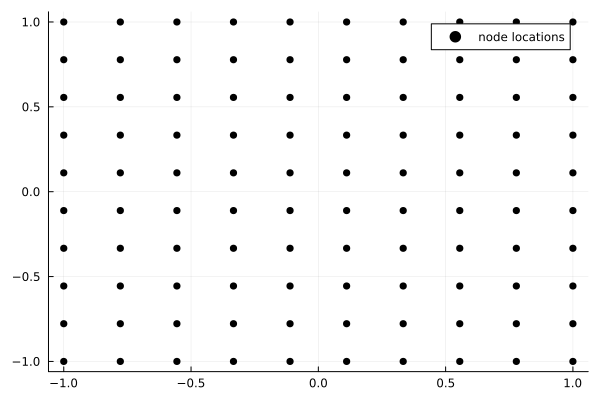

In [5]:
# 2. Create node matrix X

x = range(-1.0, 1.0, length=k) 
xs = vcat([x[i] for i ∈ 1:length(x), j ∈ 1:length(x)]...)
ys = vcat([x[j] for i ∈ 1:length(x), j∈ 1:length(x)]...)

X = hcat(xs, ys)  # X[:,1] are the x positions, X[:,2] are the y positions

size(X,1) == n_nodes

p = scatter(X[:,1], X[:,2], color=:black, label="node locations")

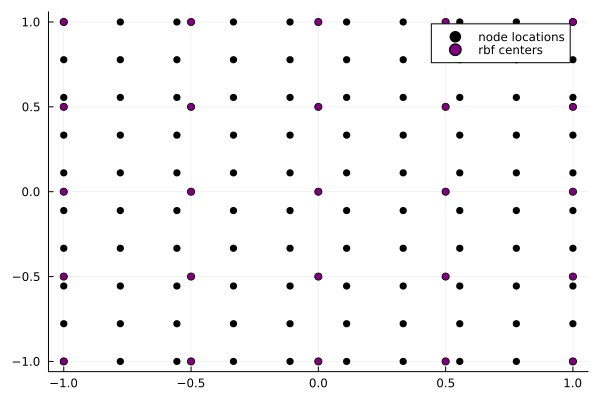

In [6]:
# 3. Create rbf centers matrix M

x = range(-1.0, 1.0, length=m) 
xs = vcat([x[i] for i ∈ 1:length(x), j ∈ 1:length(x)]...)
ys = vcat([x[j] for i ∈ 1:length(x), j∈ 1:length(x)]...)

M = hcat(xs, ys)  # X[:,1] are the x positions, X[:,2] are the y positions

size(M,1) == n_rbf_centers

scatter!(M[:,1], M[:,2], color=:purple, label="rbf centers")

In [7]:
# 4. Initialize rbf width
# initialize the rbf variance to the mean squared distance between rbf centers
using Distances

σ = mean(sqeuclidean(M[:,1], M[:,2]))  # sqeuclidean is Squared Euclidean distance

25.0

In [8]:
# 5. Create rbf matrix Φ

# this matrix contains the RBF basis functions applied to each latent point *plus* one constant row to enable fitting a bias. 
Φ = zeros(n_nodes, n_rbf_centers + 1)
for j ∈ 1:n_rbf_centers, i∈1:n_nodes
    Φ[i,j] = exp(-sqeuclidean(X[i,:], M[j,:])/(2σ))
end

# set the last column to ones 
Φ[:,end] .= 1

Φ

100×26 Matrix{Float64}:
 1.0       0.995012  0.980199  0.955997  …  0.904837  0.882497  0.852144  1.0
 0.999013  0.998458  0.987974  0.967873     0.912015  0.893459  0.866572  1.0
 0.996057  0.999938  0.993846  0.977963     0.917436  0.902773  0.879506  1.0
 0.991151  0.999445  0.99778   0.986207     0.921067  0.910384  0.890871  1.0
 0.984322  0.99698   0.999753  0.992559     0.922888  0.916247  0.900602  1.0
 0.975611  0.992559  0.999753  0.99698   …  0.922888  0.920328  0.908643  1.0
 0.965069  0.986207  0.99778   0.999445     0.921067  0.922604  0.914947  1.0
 0.952757  0.977963  0.993846  0.999938     0.917436  0.923059  0.919477  1.0
 0.938746  0.967873  0.987974  0.998458     0.912015  0.921693  0.922205  1.0
 0.923116  0.955997  0.980199  0.995012     0.904837  0.918512  0.923116  1.0
 0.999013  0.99403   0.979231  0.955054  …  0.920158  0.897439  0.866572  1.0
 0.998027  0.997472  0.986999  0.966918     0.927457  0.908587  0.881245  1.0
 0.995074  0.998951  0.992865  0.976997 

In [9]:
# 6. perform PCA on data to set up linear basis functions. 
using MultivariateStats

# dataset has rows as our records. PCA wants them as the columns
size(𝒟)
pca = fit(PCA, 𝒟'; maxoutdim=3)

PCA(indim = 10, outdim = 3, principalratio = 0.870371001924444)

Pattern matrix (unstandardized loadings):
───────────────────────────────────
          PC1        PC2        PC3
───────────────────────────────────
1   -2.23544   -4.60112    3.2542
2   -3.05877    2.30219   -0.892043
3    7.49359   -2.10196    1.88858
4    1.4984     4.03441    2.76862
5    0.72444   -0.584785  -4.10281
6    0.645328   6.18586    1.02383
7   -2.00928    1.46296    1.18199
8    0.361678  -0.608499  -3.2941
9   -4.24339   -0.402499   1.49673
10   1.80407    2.40886   -0.845688
───────────────────────────────────

Importance of components:
──────────────────────────────────────────────────────────
                                 PC1        PC2        PC3
──────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  99.1226    94.247     55.7024
Variance explained          0.34638    0.329342   0.19465
Cumulative variance         0.34638    0.675721   0.870371
Proportion explained 

In [10]:
# 7. Set U matrix to first two principle axes (since latent space is two dimensional)

pca_vecs = projection(pca)  # this results the princiap component vectors (columns) sorted in order of explained variance 
pca_var = principalvars(pca)

size(pca_vecs)
size(pca_var)
U = pca_vecs[:,1:2] 
for i ∈ axes(U,2)
    U[:,i] .= sqrt(pca_var[i]).*U[:,i]  # we still need to figure out why they're scaling by the explained variance...
end

In [11]:
U

10×2 Matrix{Float64}:
 -2.23544   -4.60112
 -3.05877    2.30219
  7.49359   -2.10196
  1.4984     4.03441
  0.72444   -0.584785
  0.645328   6.18586
 -2.00928    1.46296
  0.361678  -0.608499
 -4.24339   -0.402499
  1.80407    2.40886

In [12]:
# 8. Initialize parameter matrix W using Φ, and U
function Init_W_Matrix(X,Φ,U)
    # We want to find W such that WΦ' = UX'
    # therefore, W' is the solution to Φ'⋅Φ⋅W' = Φ'UX'
    return ((Φ'*Φ)\(Φ'*X*U'))'
end

Init_W_Matrix (generic function with 1 method)

::: {.callout-note}
I have done this differently thant than `ugtm.py`. They standardize the vectors first. I think they also have a typo in how they solve for W (they leave `UX'` out until the end. See [this link](https://github.com/hagax8/ugtm/blob/master/ugtm/ugtm_core.py#L145). Maybe this is just an approximation to speed things up.
:::

In [13]:
W = Init_W_Matrix(X,Φ,U)

10×26 adjoint(::Matrix{Float64}) with eltype Float64:
 -18703.4         1.14544e5  -29127.3    …   41018.6    -76014.3    53.9257
  -4857.21    19306.1         -4947.7        11294.4    -14737.6     8.42081
  20432.1        -1.03849e5   26486.0       -46118.4     72842.0   -47.5287
  14828.5    -91966.7         23382.0       -32449.5     60818.9   -43.3706
   1055.05    -3940.59         1011.32       -2468.83     3079.99   -1.69384
  17114.0        -1.10708e5   28130.3    …  -37170.1     72381.1   -52.4975
  -3309.64    13470.6         -3450.43        7676.45   -10193.3     5.90667
   -236.655    3092.17         -780.273        417.986   -1749.06    1.56091
 -15411.2     84264.3        -21464.8        34420.5    -57786.0    39.023
  11948.5    -71591.5         18210.9       -26301.9     47802.2   -33.603

In [14]:
W2 = U*X'*((Φ'*Φ)\ Φ')'  # this is how they do it... 

10×26 Matrix{Float64}:
 -18701.3         1.14527e5  -29122.1    …   41012.4    -76002.2    53.9162
  -4858.91    19318.5         -4952.73       11298.6    -14745.9     8.42715
  20434.3        -1.03864e5   26493.2       -46123.5     72851.8   -47.5361
  14826.6    -91951.7         23377.3       -32444.1     60808.2   -43.3623
   1055.47    -3943.7          1012.56       -2469.9      3082.06   -1.69543
  17110.7        -1.10683e5   28121.9    …  -37161.0     72363.3   -52.4838
  -3310.72    13478.5         -3453.63        7679.15   -10198.5     5.91067
   -236.264    3089.25         -779.192        416.963   -1747.07    1.55938
 -15411.6     84266.7        -21466.7        34421.1    -57787.1    39.0238
  11947.6    -71583.4         18208.5       -26298.8     47796.3   -33.5984

In [15]:
# 9. Initialize Y using W and Φ
Y = W*Φ'

10×100 Matrix{Float64}:
  6.82787    6.34193     5.85095   …  -5.83571   -6.33801    -6.84432
  0.754489   0.0772084  -0.601325      0.604246  -0.0766779  -0.758579
 -5.38248   -3.72831    -2.06876       2.05423    3.72502     5.40008
 -5.5259    -5.20154    -4.87318       4.86099    5.19838     5.53897
 -0.139206   0.0212586   0.181994     -0.182603  -0.021362    0.14009
 -6.82314   -6.68984    -6.5519    …   6.53737    6.68598     6.8383
  0.544894   0.100064   -0.345621      0.347642  -0.0996882  -0.547687
  0.246684   0.327252    0.407746     -0.40739   -0.327125   -0.246921
  4.63889    3.70448     2.76597      -2.75442   -3.70172    -4.65227
 -4.2074    -3.81336    -3.4161        3.40653    3.81093     4.21789

In [16]:
# 10. Set noise varaiance parameter

β⁻¹ = maximum([mean(pairwise(sqeuclidean, Y, dims=2))/2, pca_var[end]])

#  β⁻¹ = pca_var[end]

78.78030347169494

We now have everything we need to begin the EM algorithm. The Procedure is as follows: 

1. Create distance matrix between projections `Y` and the data `T`. 
2. Continue until convergence: 
    1. Update data distribution `P`
    2. Update responsabilities `R` 
    3. Update diagonal matrix `G`
    4. Update parameter matrix `W` 
    5. Update manifold matrix `Y` 
    6. Update distance matrix `D`
    7. Update variance `β⁻¹`
    8. Estimate log-likelihood 
    9. Check for convergence. 
3. Compute represenation 1: `means` 
4. Compute representation 2: `modes`

In [17]:
println(size(𝒟))
println(size(Y))
D = pairwise(sqeuclidean, Y, 𝒟')'

(500, 10)
(10, 100)


500×100 adjoint(::Matrix{Float64}) with eltype Float64:
 603.094   517.11   440.435  373.217  …  538.835  510.758  492.637   484.559
 913.456   838.553  772.75   716.206     146.954  129.437  121.697   123.832
 328.496   273.408  227.8    191.804     584.487  587.708  601.027   624.525
 109.075   133.796  168.263  212.576     662.189  745.829  839.779   944.119
 501.067   498.385  505.135  521.439     276.184  331.661  397.186   472.849
 843.339   776.729  719.268  671.107  …  166.999  157.887  158.591   169.208
 102.16    123.413  154.404  195.232     650.326  730.478  820.934   921.773
 115.916   147.906  189.681  241.337     740.939  831.939  933.283  1045.05
 500.948   497.538  503.546  519.094     236.155  290.869  355.618   430.493
 509.347   508.938  517.963  536.543     276.65   334.405  402.208   480.151
 865.257   795.452  734.771  683.37   …  139.153  126.791  124.224   131.553
  94.9527  124.308  163.449  212.471     737.56   825.928  924.64   1033.77
 116.789   137.469  16

In this next step, we need to be able to compute the probabilities 
\begin{equation}
    p(\mathbf{t}_n\vert \mathbf{x}_k, W, \beta) \propto \exp\left(-\frac{\beta}{2}\lVert \mathbf{y}(\mathbf{x}_k,W) - \mathbf{t}_n \rVert^2 \right)
\end{equation}

when we use these probabilitieis to compute the responsabilities: 
\begin{equation}
    r_{kn} = \frac{p(\mathbf{t}_n\vert \mathbf{x}_k, W, \beta)}{\sum_{k'}p(\mathbf{t}_n \vert \mathbf{x}_{k'}, W, \beta)}
\end{equation}
we can run into numerical overflow (i.e. exponentiating large numbers can easily blow up to larger than we can represent with a `Float64`). To avoid this trick, we take advantage of [this cool trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/):
\begin{equation}
    \pi_i := \frac{\exp(x_i)}{\sum_j \exp(x_j)} = \frac{\exp(x_i-b)\exp(b))}{\sum_j\exp(x_j-b)\exp(b)} = \frac{\exp(x_i-b)}{\sum_j \exp(x_j-b)}.
\end{equation}
Choosing $b=\max\{x_i\}_{i=1}^{n}$ means well never exponentiate anything larger than $0$! 

In [18]:
# 1. Update distribution `P`

function Posterior(β⁻¹, D)
    inner = - D' ./ (2*β⁻¹)
    exp.(inner .- maximum(inner))
end
    

Ptest = Posterior(β⁻¹, D)

100×500 Matrix{Float64}:
 0.0336957   0.00470005  0.192516   …  0.748761    0.676722    0.00884923
 0.0581538   0.00756072  0.273092      0.627834    0.562618    0.0136877
 0.0946067   0.0114799   0.364771      0.494816    0.439621    0.0199773
 0.144944    0.0164361   0.458395      0.366329    0.322655    0.0274855
 0.208926    0.0221626   0.541549      0.254654    0.222344    0.0356072
 0.283085    0.0281092   0.601127   …  0.166207    0.143851    0.043383
 0.360304    0.033492    0.626766      0.101892    0.0874167   0.0496546
 0.430606    0.0374479   0.613933      0.0587312   0.0499489   0.0533403
 0.483254    0.0392629   0.565358      0.0318864   0.0268848   0.053748
 0.509604    0.0385909   0.490148      0.0163503   0.0136689   0.0507987
 0.0342877   0.00821162  0.178365   …  0.787785    0.700696    0.0147263
 0.0592901   0.0132493   0.253306      0.660479    0.582446    0.0228413
 0.0965259   0.0201426   0.338457      0.520402    0.454975    0.0333754
 ⋮                         

In [19]:
sum(Ptest, dims=1)

1×500 Matrix{Float64}:
 16.6721  20.8193  23.1625  22.1693  …  24.228  20.3408  17.1458  22.7755

In [20]:
# 2. Update responsabilities R

function Responsabilities(P)
    # sum along rows since each column is a new data point
    Σs = sum(P, dims=1)
    
    R = P
    for j ∈ axes(R,2)
        R[:,j] .= (R[:,j] ./ Σs[j])
    end
    return R
end

testR = Responsabilities(Ptest)

100×500 Matrix{Float64}:
 0.00202108   0.000225755  0.00831154   …  0.0394686    0.000388541
 0.00348809   0.000363159  0.0117903       0.0328137    0.000600981
 0.00567455   0.000551408  0.0157483       0.0256401    0.000877137
 0.00869378   0.000789462  0.0197903       0.0188183    0.0012068
 0.0125315    0.00106452   0.0233804       0.0129678    0.00156339
 0.0169796    0.00135015   0.0259526    …  0.00838987   0.00190481
 0.0216112    0.0016087    0.0270595       0.00509842   0.00218017
 0.0258279    0.00179871   0.0265054       0.00291318   0.002342
 0.0289858    0.00188589   0.0244083       0.00156801   0.0023599
 0.0305663    0.00185361   0.0211612       0.000797212  0.00223041
 0.00205659   0.000394423  0.00770059   …  0.0408669    0.000646584
 0.00355625   0.000636395  0.010936        0.0339701    0.00100289
 0.00578967   0.000967498  0.0146123       0.0265356    0.0014654
 ⋮                                      ⋱               
 0.00641213   0.0315219    0.0025469       0.000

0.9999999999999999


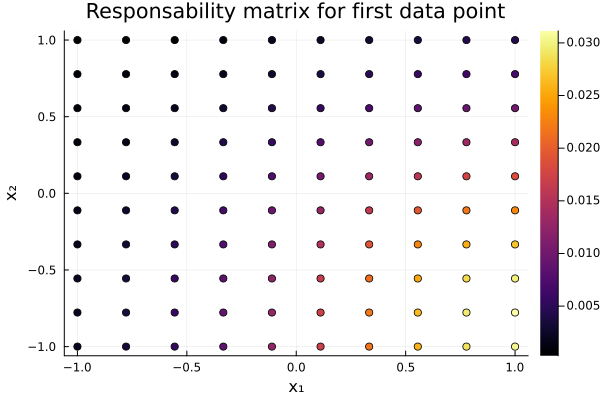

In [21]:
println(sum(testR[:,1]))

scatter(X[:,1], X[:,2],
    zcolor=testR[:,1],
    label="",
    xlabel="x₁",
    ylabel="x₂",
    title="Responsability matrix for first data point"
)

In [22]:
Σs = sum(testR, dims=2)

100×1 Matrix{Float64}:
 5.270988586108698
 5.203487543373579
 5.159892266167381
 5.19336128556256
 5.319755065033108
 5.513619817151002
 5.716815257119075
 5.855947301654589
 5.862742798211288
 5.691700866974154
 5.484404832180334
 5.384138243422857
 5.298448885604486
 ⋮
 4.553882482951323
 4.2438179154570355
 3.706214494565581
 4.0302129678379375
 4.279109557883407
 4.462821610105696
 4.592327324580734
 4.669781298038044
 4.682743830970214
 4.60608261326271
 4.411794455081603
 4.082992869010511

While the GTM model is not yet fit, we can clearly see the nice smoothness properties of the GTM activations for each latent node at play. 

Next we need to construct a function for generating the diagonal matrix `G` from our responsabilities. 

In [23]:
# 3. Update diagonal matrix `G`

function GetGMatrix(R)
    # G is determined by the sum over data points at each node
    Σs = vec(sum(R, dims=2))
    return diagm(Σs)
end

testG = GetGMatrix(testR)

100×100 Matrix{Float64}:
 5.27099  0.0      0.0      0.0      …  0.0      0.0      0.0      0.0
 0.0      5.20349  0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      5.15989  0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      5.19336     0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0      …  0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0      …  0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 ⋮                                   ⋱              

In [24]:
println(size(Φ))
println(size(testG))

Φ'*testG*Φ

(100, 26)
(100, 100)


26×26 Matrix{Float64}:
 449.469  456.127  458.351  456.077  …  455.883  453.619  446.946  473.745
 456.127  462.958  465.29   463.055     462.783  460.558  453.856  480.916
 458.351  465.29   467.708  465.535     465.187  463.024  456.358  483.415
 456.077  463.055  465.535  463.447     463.024  460.945  454.381  481.17
 449.369  456.317  458.835  456.849     456.358  454.381  447.983  474.245
 455.538  462.286  464.54   462.234  …  462.332  460.036  453.268  480.29
 462.286  469.209  471.572  469.306     469.329  467.073  460.275  487.559
 464.54   471.572  474.023  471.82      471.767  469.573  462.813  490.093
 462.234  469.306  471.82   469.703     469.573  467.464  460.808  487.816
 455.436  462.478  465.029  463.016     462.813  460.808  454.318  480.795
 457.168  463.94   466.202  463.887  …  464.281  461.975  455.179  482.157
 463.94   470.887  473.259  470.984     471.307  469.041  462.214  489.454
 466.202  473.259  475.718  473.507     473.755  471.552  464.763  491.997
 463

In [25]:
println(size(Φ'))
println(size(testR))
println(size(𝒟))

Φ'*testR * 𝒟

(26, 100)
(100, 500)
(500, 10)


26×10 Matrix{Float64}:
 -261.59   1077.55  753.524  -1589.33  …   -992.69   719.924  589.339
 -273.021  1082.81  791.65   -1607.99     -1006.69   715.984  604.58
 -281.953  1077.34  822.58   -1610.93     -1010.88   704.807  614.087
 -288.123  1061.29  845.404  -1598.08     -1005.14   686.724  617.579
 -291.349  1035.14  859.447  -1569.8       -989.633  662.267  614.953
 -281.118  1100.49  756.758  -1597.38  …  -1008.48   728.386  605.618
 -292.918  1105.95  795.27   -1616.02     -1022.76   724.417  621.211
 -302.027  1100.44  826.558  -1618.87     -1027.07   713.127  630.911
 -308.176  1084.13  849.701  -1605.84     -1021.3    694.849  634.431
 -311.186  1057.51  864.013  -1577.32     -1005.59   670.121  631.667
 -298.216  1112.87  752.498  -1589.6   …  -1014.5    729.723  616.154
 -310.273  1118.47  791.018  -1608.03     -1028.92   725.765  631.951
 -319.471  1112.99  822.358  -1610.75     -1033.32   714.472  641.749
 -325.539  1096.58  845.594  -1597.67     -1027.56   696.178  645.26

In [26]:
# 4. Update parameter matrix W

# default regularization parameter to 0.0 unless otherwise specified
# regularization term is αβ⁻¹I. 
function UpdateW(R, Φ, G, 𝒟, β⁻¹; α=0.0)
    LHS = Φ'*G*Φ
    if α > 0 
        LHS .= LHS +  α*β⁻¹*I
    end
   
    # now we have (LHS)W =  Φ'R𝒟
    W_new = LHS\(Φ'*R*𝒟)
    return W_new'
end

W1 = UpdateW(testR, Φ, testG, 𝒟, β⁻¹)
#W2 = UpdateW(testR, Φ, testG, 𝒟, β⁻¹; α=0.5)

10×26 adjoint(::Matrix{Float64}) with eltype Float64:
     -2.20266e5   -3.12138e5       5.45597e5  …      -4.9478e5   -260.308
 -42985.6        -84.3087          3.06742e5          3.66509e5   231.078
      2.65987e5    4.24504e5      -1.20506e6         -4.50353e5  -182.856
     -7.27478e5   -5.50346e5       2.29158e6     -30563.0         700.014
 931010.0          9.52137e5      -2.90023e6          4.07587e5  -403.777
 -72194.0          3.81287e5  274640.0        …       5.81112e5   837.586
     -4.48883e5   -4.50589e5       1.49966e6      18804.5         305.99
      5.74648e5    5.05304e5      -1.75306e6     236804.0        -337.267
     -4.4513e5    -5.36939e5       1.50089e6     -72687.3         118.802
     -1.93793e5   -2.08182e5       6.75236e5      66276.1         198.182

In [27]:
ND = size(testR,1) * size(testR,2)
newbetainv = sum(testR*D)/ND

401.2427310705195

Now let's skip ahead a couple of steps since the next two are just recalculating `Y` and `D` 

In [28]:
# 7. Update β⁻¹

function UpdateBeta(R, D)
    ND = size(R,1)*size(R,2)
    return sum(R*D)/ND
end

UpdateBeta(testR, D)


401.2427310705195

In [29]:
n_nodes = size(Ptest,1)
n_datapoints = size(Ptest, 2)
n_dimensions = size(𝒟, 2)  # number of columns for each data record

println(n_nodes)
println(n_datapoints)
println(n_dimensions)

loglikelihood = 0.0 
prior = 1.0/n_nodes
# now we need the exponential prefactor that we skipped before when calculating P matrix
prefactor = (1/(2*π*β⁻¹))^(n_dimensions/2)

-sum(log.(prior .* prefactor .* Ptest))  # we want to maximize log-likelihood or minimize -log-likelihood

100
500
10


2.037922385452767e6

The last piece we need is the ability to estimate the log-likelihood function...

In [30]:
function estimateLogLikelihood(P, β⁻¹, 𝒟)
    n_nodes = size(Ptest,1)
    n_datapoints = size(Ptest, 2)
    n_dimensions = size(𝒟, 2)  # number of columns for each data record

    prior = 1.0/n_nodes
    # now we need the exponential prefactor that we skipped before when calculating P matrix
    prefactor = (1/(2*π*β⁻¹))^(n_dimensions/2)

    loglikelihood = sum(log.(prior .* prefactor .* Ptest))./n_datapoints  # we want to maximize log-likelihood or minimize -log-likelihood
    return loglikelihood
end

ll = estimateLogLikelihood(Ptest, β⁻¹, 𝒟)

-4075.844770905534

supposing we have fit our model and now have the final responsability matrix, we will then need the ability to visualize the results! Recall that we have two *nice* ways to do this: 

1. With the mean $\langle \mathbf{x} \vert \mathbf{t}_n, W, \beta \rangle = \sum_k^K R_{kn}\mathbf{x}_k$
2. With the mode $\mathbf{x}_{\text{mode}} = \mathbf{x}_{k^\text{max}}$ where $k^{\text{max}} = \underset{\{k\}}{\text{argmax}} R_{kn}$

(100, 500)
(100, 2)


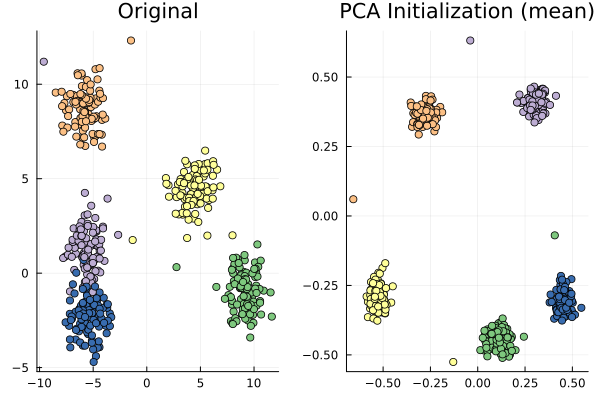

In [53]:
println(size(testR))
println(size(X))

res = testR' * X


cpalette = cgrad(:Accent_5, 5, categorical=true)
p1 = scatter(res[:,1], res[:,2], marker_z=int(Datay), color=cpalette, label="", colorbar=false, title="PCA Initialization (mean)") 
p2 = scatter(𝒟[:,1],𝒟[:,2], marker_z=int(Datay), color=cpalette, label="", colorbar=false, title="Original")

plot(p2, p1)

(100, 500)


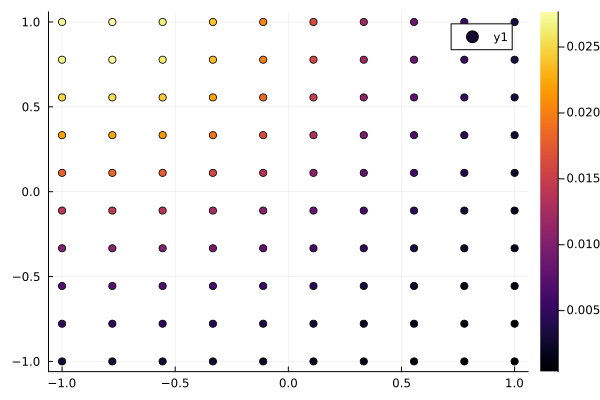

In [54]:
# nodex × datapoints
println(size(testR))
argmax(testR[:,1])

scatter(X[:,1], X[:,2], marker_z=testR[:,5])




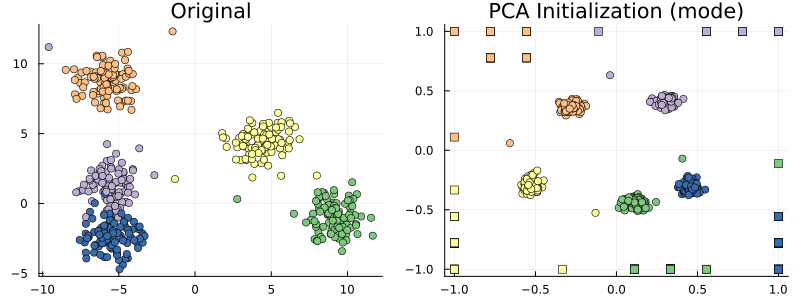

In [55]:
idx = argmax(testR, dims=1)
idx = [idx[i][1] for i ∈ 1:length(idx)]
res = X[idx, :]

# p3 = scatter(res[:,1], res[:,2], marker_z=int(Datay), color=cpalette, label="", colorbar=false, title="PCA Initialization (mode)")
# plot(p2, p1, p3, layout=(1,3), size=(1200, 300))


scatter!(p1, res[:,1], res[:,2], marker_z=int(Datay), color=cpalette, marker=:square, label="", colorbar=false, title="PCA Initialization (mode)")
plot(p2, p1, size=(800, 300))

In [58]:
function get_means(R, X)
    return R' * X
end

function get_modes(R, X)
    idx = argmax(R, dims=1)
    idx = [idx[i][1] for i ∈ 1:length(idx)]
    return X[idx, :]
end

println(size(testR))


get_means(testR, X);
get_modes(testR, X);

(100, 500)


We now have all of the pieces we need to be able to perform the EM algorithm until our model has converged. Let's try it out!: 

Summary of all steps: 

1. Initialize GTM grid parameters: number of nodes = k*k, number of rbf centers = m*m
2. Create node matrix $X$ (holding coordinates)
3. Create rbf centers matrix M
4. Initialize rbf width $\sigma$
5. Create rbf matrix $\Phi$
6. Perform PCA on the data 
7. Set U matrix to 2 first principal axes of data cov. matrix (result of PCA)
8. Initialize parameter matrix W using U and $\Phi$
9. Initialize manifold Y using W and $\Phi$
10. Set noise variance parameter $\beta^{-1}$ to the largest between:
    1. the 3rd eigenvalue of the data covariance matrix (i.e. 3d explained variance value)
    2. half the average distance between centers of Gaussian components

11. Create distance matrix D between manifold and data matrix
12. Repeat until convergence 
    1. Update data distribution P
    2. Update responsibilities R
    3. Update diagonal matrix G
    4. Update parameter matrix W
    5. Update manifold matrix Y
    6. Update distance matrix D
    7. Update noise variance parameter $\beta^{-1}$
    8. Estimate log likelihood and check for convergence
13. Compute 2D GTM representation 1: means
14. Compute 2D GTM representation 2: modes


In [60]:
function getCoordsMatrix(k)
    x = range(-1.0, 1.0, length=k) 
    xs = vcat([x[i] for i ∈ 1:length(x), j ∈ 1:length(x)]...)
    ys = vcat([x[j] for i ∈ 1:length(x), j∈ 1:length(x)]...)
    X = hcat(xs, ys)  # X[:,1] are the x positions, X[:,2] are the y positions
end


getCoordsMatrix (generic function with 1 method)

In [61]:
function getΦMatrix(X, M)
    Φ = zeros(n_nodes, n_rbf_centers + 1)
    for j ∈ axes(M,1), i∈axes(X,1)
        Φ[i,j] = exp(-sqeuclidean(X[i,:], M[j,:])/(2σ))
    end
    
    # set the last column to ones to allow for a bias term
    Φ[:,end] .= 1
    
    return Φ
end

getΦMatrix (generic function with 1 method)

In [66]:
# 0. load dataset
using RDatasets

iris = dataset("datasets","iris")

Dataset =Matrix(iris[:, 1:4])
classes = iris[:,5]


# 1. Initialize GTM Parameters 
k = 20  # there are K=k² total latent nodes
m = 10  # there are M=m² basis functions (centers of our RBFs) 
σ = 0.3 # the σ² is the variance in our RBFs
α=0.1 # reglarization parameter
tol = 0.0001 #  stop fitting if difference in log-likelihood is less than this amount
verbose = true

n_nodes = k*k 
n_rbf_centers = m*m 


# 2. create node matrix `X`
X = getCoordsMatrix(k)

# 3. create RBF centers matrix `M`
M = getCoordsMatrix(m)

# 4. Initialize RBF variance `σ`
σ = mean(sqeuclidean(M[:,1], M[:,2]))  # sqeuclidean is Squared Euclidean distance

# 5. Create RBF matrix `Φ`
Φ = getΦMatrix(X,M)

# 6. Perform PCA on Data 
pca = fit(PCA, Dataset'; maxoutdim=3)

# 7. Set U to first two columns of data covariance matrix
pca_vecs = projection(pca)  # this results the princiap component vectors (columns) sorted in order of explained variance 
pca_var = principalvars(pca)

U = pca_vecs[:,1:2] 
for i ∈ axes(U,2)
    U[:,i] .= sqrt(pca_var[i]).*U[:,i] 
end

# 8. Initialize parameter matrix `W` 
W = Init_W_Matrix(X, Φ, U)

# 9. Initialize projection manifold `Y`
Y = W*Φ'

# 10. Initialize covariance `β⁻¹`
β⁻¹ = maximum([mean(pairwise(sqeuclidean, Y, dims=2))/2, pca_var[end]])


# 11. Create distance matrix `D` 
D = pairwise(sqeuclidean, Y, Dataset')'

# 12. Repeat unitl convergence 
# niter = 1000  # default maximum number of iterations
niter = 20  # default maximum number of iterations
i = 1  
diff = 1000
converged =0
minusℓ = 1000
minusℓ_prev = 1000 
while i < (niter) && converged < 4

    # 1. update data distribution
    Pmat = Posterior(β⁻¹, D)
    
    # 2. compute responsabilities
    R = Responsabilities(Pmat)
    
    # 3. Update diagonal matrix `G`
    G = GetGMatrix(R)
    
    # 4. Update parameter matrix `W`
    W = UpdateW(R, Φ, G, Dataset, β⁻¹; α=α)
    
    # 5. Update manifold matrix `Y`
    Y = W*Φ'
        
    # 6. Update distance matrix `D`
    D = pairwise(sqeuclidean, Y, Dataset')'
    
    # 7. Update `β⁻¹`
    β⁻¹ = UpdateBeta(R, D)
    
    # 8. Estimate log-likelihood and check for convergence
    if i == 1
        minusℓ = -estimateLogLikelihood(Pmat, β⁻¹, Dataset)
    else
        minusℓ_prev = minusℓ
        minusℓ = -estimateLogLikelihood(Pmat, β⁻¹, Dataset)
        
        diff = abs(minusℓ_prev - minusℓ)
    end

    # we need to have 4 consecutaive updates with diff at or below the tolerance to exit
    if diff <= tol
        converged += 1
    else
        converged = 0 
    end

    if verbose
        println("Iter: ", i, "  ℓ: ", -minusℓ)
    end
    
    
    i += 1
end


Pmat = Posterior(β⁻¹, D);
R = Responsabilities(Pmat);

# 13. Compute mean node responsability 
Rmeans = get_means(R, X);
# 14. compute mode node responsability
Rmodes = get_modes(R, X);



Iter: 1  ℓ: -1677.4983562758482
Iter: 2  ℓ: -1645.0048054848849
Iter: 3  ℓ: -1644.0327191330757
Iter: 4  ℓ: -1643.8901319265444
Iter: 5  ℓ: -1643.8685996044135
Iter: 6  ℓ: -1643.8653369980282
Iter: 7  ℓ: -1643.8648423917648
Iter: 8  ℓ: -1643.8647674044073
Iter: 9  ℓ: -1643.8647560354252
Iter: 10  ℓ: -1643.8647543117486
Iter: 11  ℓ: -1643.864754050418


In [67]:
#Rmodes
R

400×150 Matrix{Float64}:
 0.00255425  0.00256575  0.00256974  …  0.00245752  0.00245512  0.00247454
 0.00254577  0.00255542  0.00255877     0.00246429  0.00246227  0.00247867
 0.00253821  0.00254622  0.002549       0.00247029  0.0024686   0.00248231
 0.00253157  0.00253816  0.00254044     0.00247553  0.00247413  0.00248548
 0.00252587  0.00253125  0.00253311     0.00248001  0.00247886  0.00248817
 0.00252111  0.00252548  0.00252699  …  0.00248374  0.0024828   0.0024904
 0.0025173   0.00252086  0.00252209     0.00248671  0.00248594  0.00249218
 0.00251444  0.0025174   0.00251842     0.00248894  0.0024883   0.00249351
 0.00251253  0.00251509  0.00251598     0.00249042  0.00248986  0.00249439
 0.00251159  0.00251394  0.00251476     0.00249116  0.00249064  0.00249483
 0.00251159  0.00251395  0.00251477  …  0.00249116  0.00249064  0.00249482
 0.00251256  0.00251512  0.00251601     0.00249041  0.00248985  0.00249438
 0.00251448  0.00251744  0.00251847     0.00248891  0.00248827  0.00249349
 

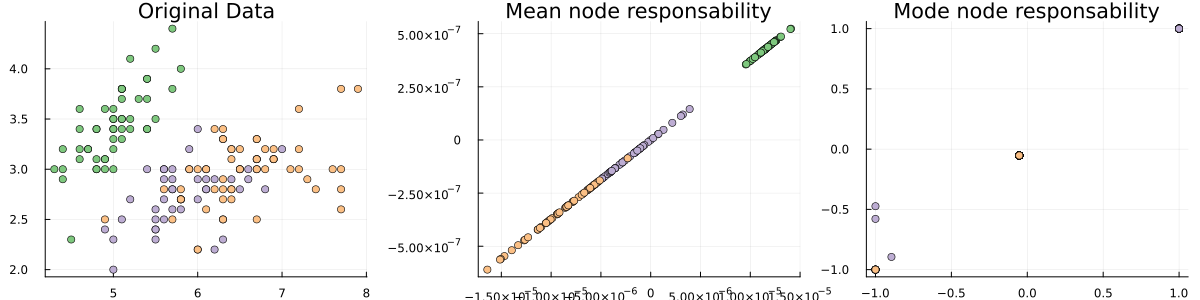

In [68]:
# Visualize! 


p1 = scatter(Dataset[:,1],Dataset[:,2], marker_z=int(classes), color=:Accent_3, label="", colorbar=false, title="Original Data")
p2 = scatter(Rmeans[:,1], Rmeans[:,2], marker_z=int(classes), color=:Accent_3, label="", colorbar=false, title="Mean node responsability") 
p3 = scatter(Rmodes[:,1], Rmodes[:,2], marker_z=int(classes), color=:Accent_3, label="", colorbar=false, title="Mode node responsability")

plot(p1, p2, p3, layout=(1,3), size=(1200, 300))